In [1]:
import matplotlib.pyplot as plt

from maploc.demo import Demo
from maploc.osm.viz import GeoPlotter
from maploc.osm.tiling import TileManager
from maploc.osm.viz import Colormap, plot_nodes
from maploc.utils.viz_2d import plot_images
from maploc.osm.parser import Patterns
from maploc.osm.download import get_osm

%load_ext autoreload
%autoreload 2
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
from vigor_osm_handler import get_osm_raster

In [2]:
proj, bbox = demo.read_input_image(
    prior_latlon=(46.204230, 6.143190),
    tile_size_meters=102.4,  # for VIGOR dataset
)

#epfl : 46.223181, 6.068631

NameError: name 'demo' is not defined

In [25]:
# We need to figure out pixe_per_meter for each dataset
ppm = 2 # To get 640x640 pixels at the end
tiler = TileManager.from_bbox(proj, bbox + 10, ppm)
canvas = tiler.query(bbox)
map_viz = Colormap.apply(canvas.raster)

plt.imshow(map_viz)

# feed canvas.raster

NameError: name 'proj' is not defined

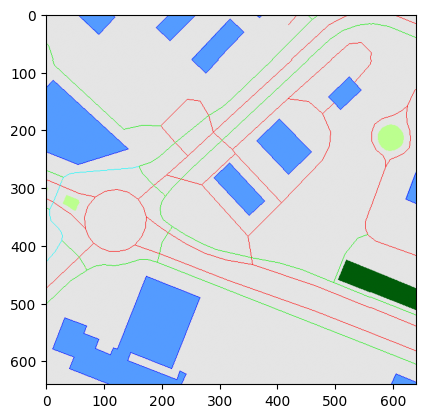

In [3]:
raster = get_osm_raster((46.223181, 6.068631))
map_viz = Colormap.apply(raster)
plt.imshow(map_viz)

In [4]:
# We need to figure out pixe_per_meter for each dataset
raster = get_osm_raster((46.223181, 6.068631))
map_viz = Colormap.apply(raster)

#plt.imshow(map_viz)

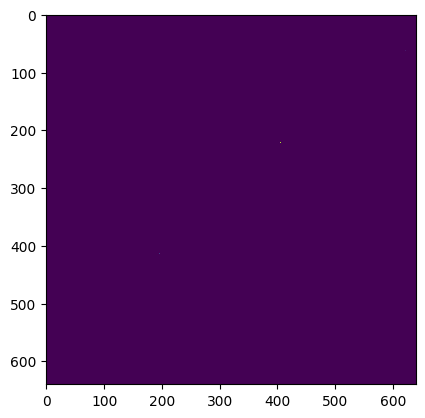

In [5]:
raster[1]
plt.imshow(raster[2], interpolation='nearest')

In [6]:
n = len(Patterns.areas.keys())+ len(Patterns.ways.keys()) + len(Patterns.nodes.keys())
n

50

In [7]:
transform_sat = transforms.Compose([
    # resize
    transforms.Resize([512, 512]),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [8]:
raster = canvas.raster
tensor = torch.from_numpy(np.ascontiguousarray(raster)).float()
transform_sat(tensor).size()

NameError: name 'canvas' is not defined

In [9]:
bbox_osm = proj.unproject(bbox + 10)
r = get_osm(bbox_osm)

NameError: name 'proj' is not defined

In [10]:
len(r['elements'])

NameError: name 'r' is not defined

In [11]:
import os, pickle, gzip

root = "../../VIGOR"
city = "NewYork"
osm_tile_path = os.path.join(root, city, 'osm_tiles', 'data.pkl.gz')
with gzip.open(osm_tile_path, 'rb') as f:
    loaded_data = pickle.load(f)

In [12]:
raster.shape

(3, 640, 640)

satellite_40.7201152747_-73.990557236.png



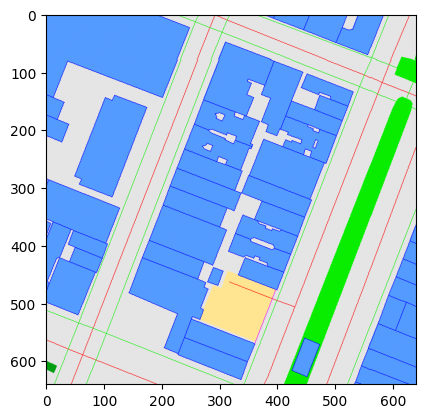

In [70]:
name, raster = loaded_data[4210]
map_viz = Colormap.apply(raster)
print(name)
plt.imshow(map_viz)

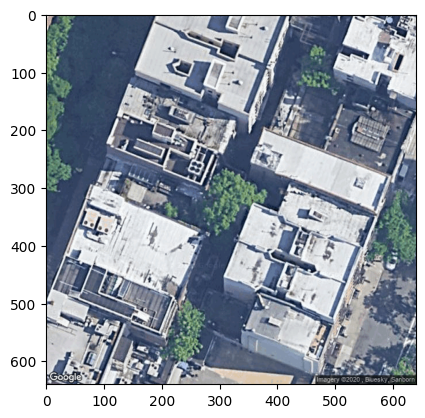

In [71]:
from PIL import Image

path = os.path.join('../../VIGOR', city, 'satellite', name[:-1])
# Load the PNG image
image = Image.open(path)
plt.imshow(image)
# plt.imshow(map_viz, alpha=0.5)

In [72]:
name

'satellite_40.7201152747_-73.990557236.png\n'

In [73]:
raster = get_osm_raster((40.7201152747,-73.990557236))
map_viz = Colormap.apply(raster)

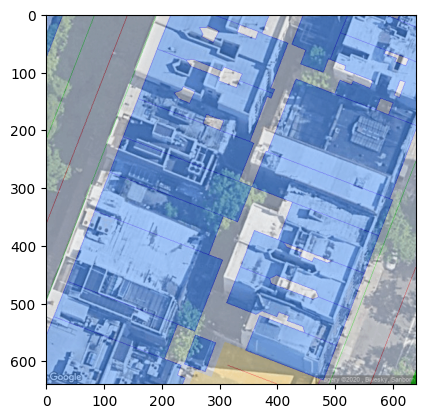

In [74]:
plt.imshow(image)
plt.imshow(map_viz, alpha=0.5)

In [75]:
raster.shape

(3, 640, 640)

In [80]:
import sys
np.set_printoptions(threshold=sys.maxsize)
raster[0].shape

(640, 640)

In [99]:
def project_to_n(matrix, n: int = 50, dim: tuple[int, int] = (640, 640), partition: list[int] = [7, 10, 33]):
    '''
        Project the matrix (expected to be [3, 640, 640]) to [n, 640, 640] where each layer n represent one OSM object.
        The input matrix is expected to comes from Orienternet representation of the rasterized map.

        For speed, this function expect to get the partition and Orienternet have this default partition :
            areas: 7
            ways: 10
            nodes: 33

    '''
    dims = (n, ) + dim
    n_matrix = np.zeros(dims)
    layer = 0
    start_index = 0
    for _ in range(len(partition)):
        print(f'start_index {start_index}')
        print(f'partition layer {partition[layer]}')
        for i in range(start_index, partition[layer]):
            n_matrix[i] = raster[0] == i

        start_index = partition[layer] + 1
        layer += 1
    
    return n_matrix

In [100]:
project_to_n(raster)

layer 0
layer 1
layer 2


KeyboardInterrupt: 